In [1]:
cd /content/drive/My Drive/Dava with ML

/content/drive/My Drive/Dava with ML


In [ ]:
!unzip indian-liver-patient-records.zip

Archive:  indian-liver-patient-records.zip
  inflating: indian_liver_patient.csv  


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics as m

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
ls

 breast-cancer-wisconsin-data.zip   hepatiits_dataset.zip
 Cancer.ipynb                       hepatities.ipynb
 cardiovaskular_dataset.zip         hepatitisdata.csv
 chronic-kidney-disease.zip         indian_liver_patient.csv
'covid pnemonia.ipynb'              indian-liver-patient-records.zip
 data.csv                           kidney.ipynb
 Dataset_spine.csv                  liver.ipynb
 dataset.zip                        model_cancer5.h5
 degree_cancer_5.tflite             model_cancer8.h5
 degree_cancer_8.tflite             model_covid.h5
 degree_covid_mobilenet.tflite      model_diabeties.h5
 degree_covid.tflite                model_heart.h5
 degree_covid_vgg.tflite            model_kidney.h5
 degree_diabeties.tflite            new_model.csv
 degree_heart.tflite                parkinson_dataset.zip
 degree_kidney.tflite               Parkinson.ipynb
 degree_liver.tflite                pd_speech_features.csv
 degreeliver.tflite                 pima-indians-diabetes-database.zip
 de

In [4]:
dataset=pd.read_csv('indian_liver_patient.csv')
dataset

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [5]:
dataset.isnull().values.any()

True

In [6]:
dataset=dataset.dropna(axis = 0, how ='any') 


In [7]:
dataset.isnull().values.any()

False

In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
le=LabelEncoder()
dataset['Gender']=le.fit_transform(dataset['Gender'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [10]:
le.classes_

array(['Female', 'Male'], dtype=object)

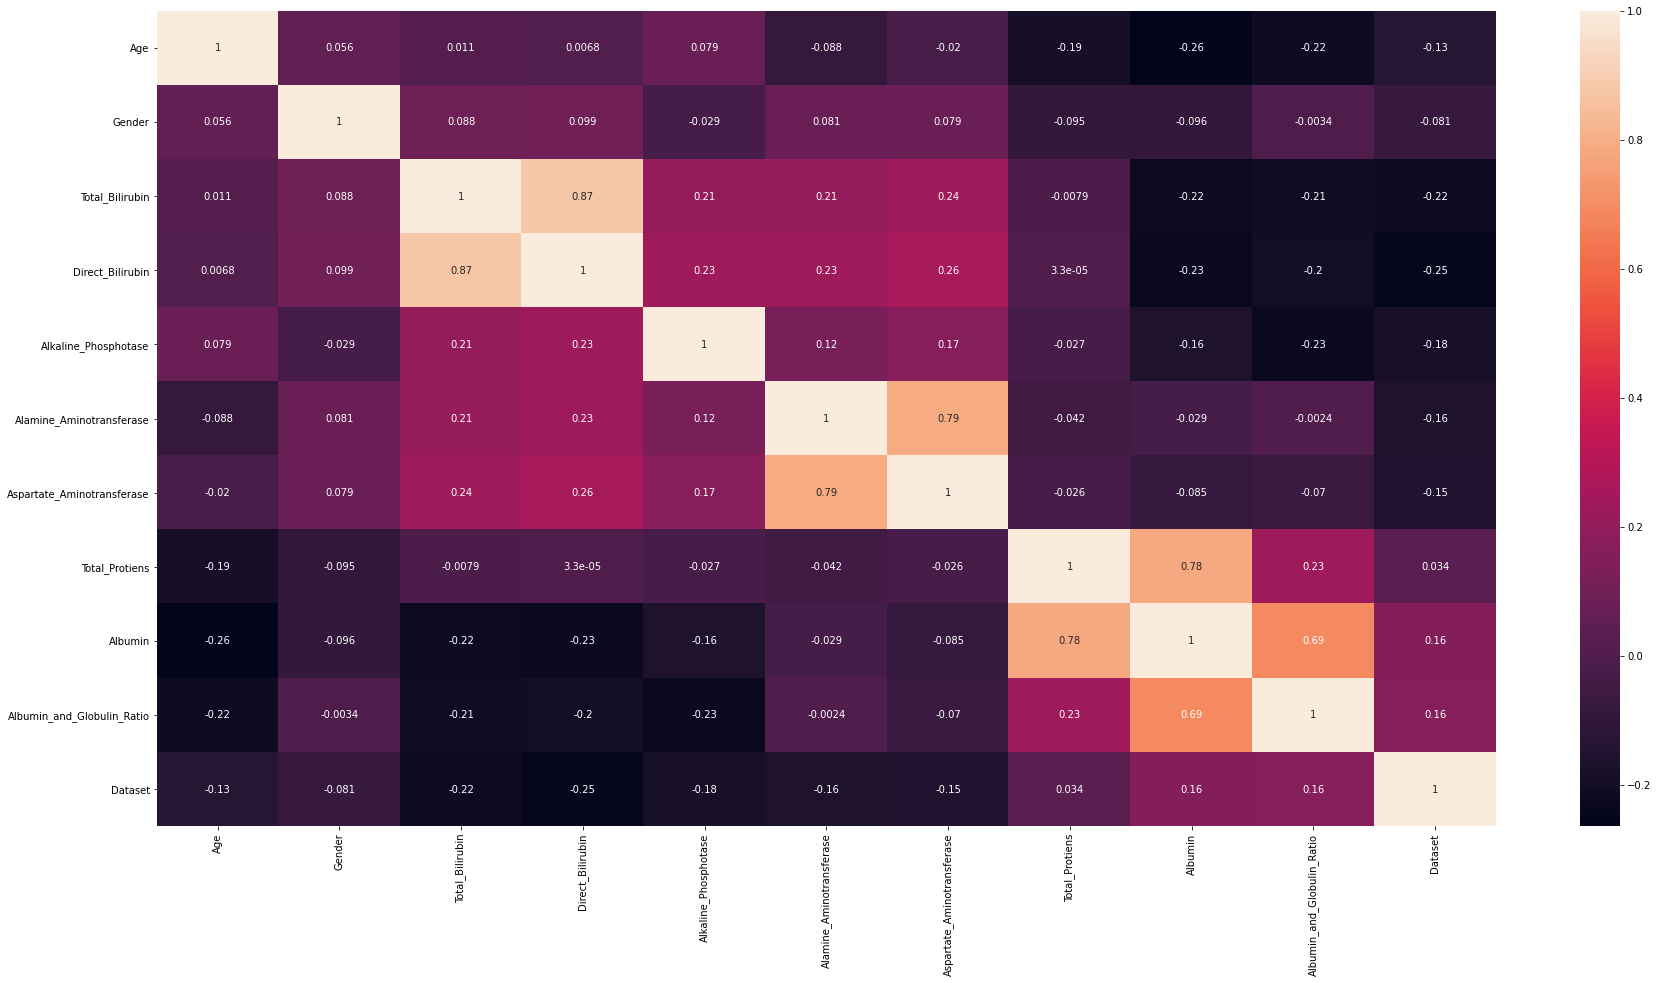

In [11]:
plt.figure(figsize=(30,15))
sns.heatmap(dataset.corr(),annot=True)
plt.show()

In [12]:
dataset.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

In [13]:
'''dataset=dataset.drop('Albumin',axis=1)'''

'''
dataset=dataset.drop('Aspartate_Aminotransferase',axis=1)
'''

"\ndataset=dataset.drop('Aspartate_Aminotransferase',axis=1)\n"

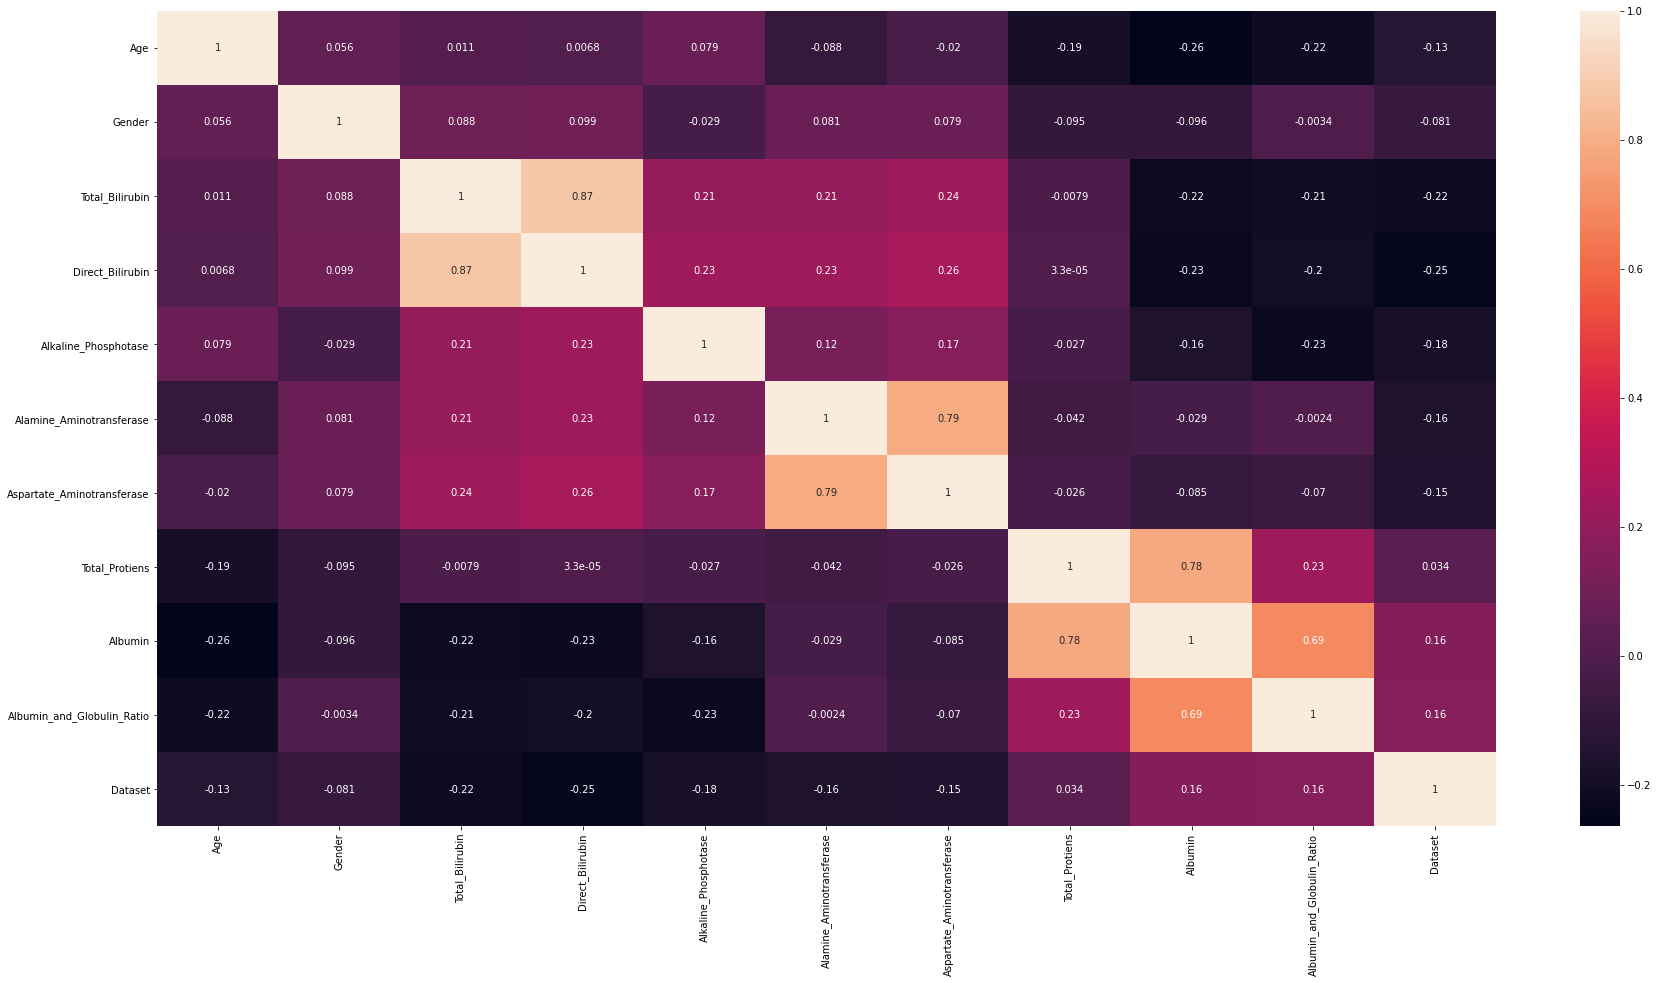

In [14]:
plt.figure(figsize=(30,15))
sns.heatmap(dataset.corr(),annot=True)
plt.show()

In [15]:
dataset=dataset.drop('Aspartate_Aminotransferase',axis=1)
dataset=dataset.drop('Albumin',axis=1)


In [16]:
dataset=dataset.drop('Total_Bilirubin',axis=1)

In [17]:
dataset=dataset.drop('Alamine_Aminotransferase',axis=1)

In [18]:
dataset=dataset.drop('Albumin_and_Globulin_Ratio',axis=1)


In [19]:
dataset.columns

Index(['Age', 'Gender', 'Direct_Bilirubin', 'Alkaline_Phosphotase',
       'Total_Protiens', 'Dataset'],
      dtype='object')

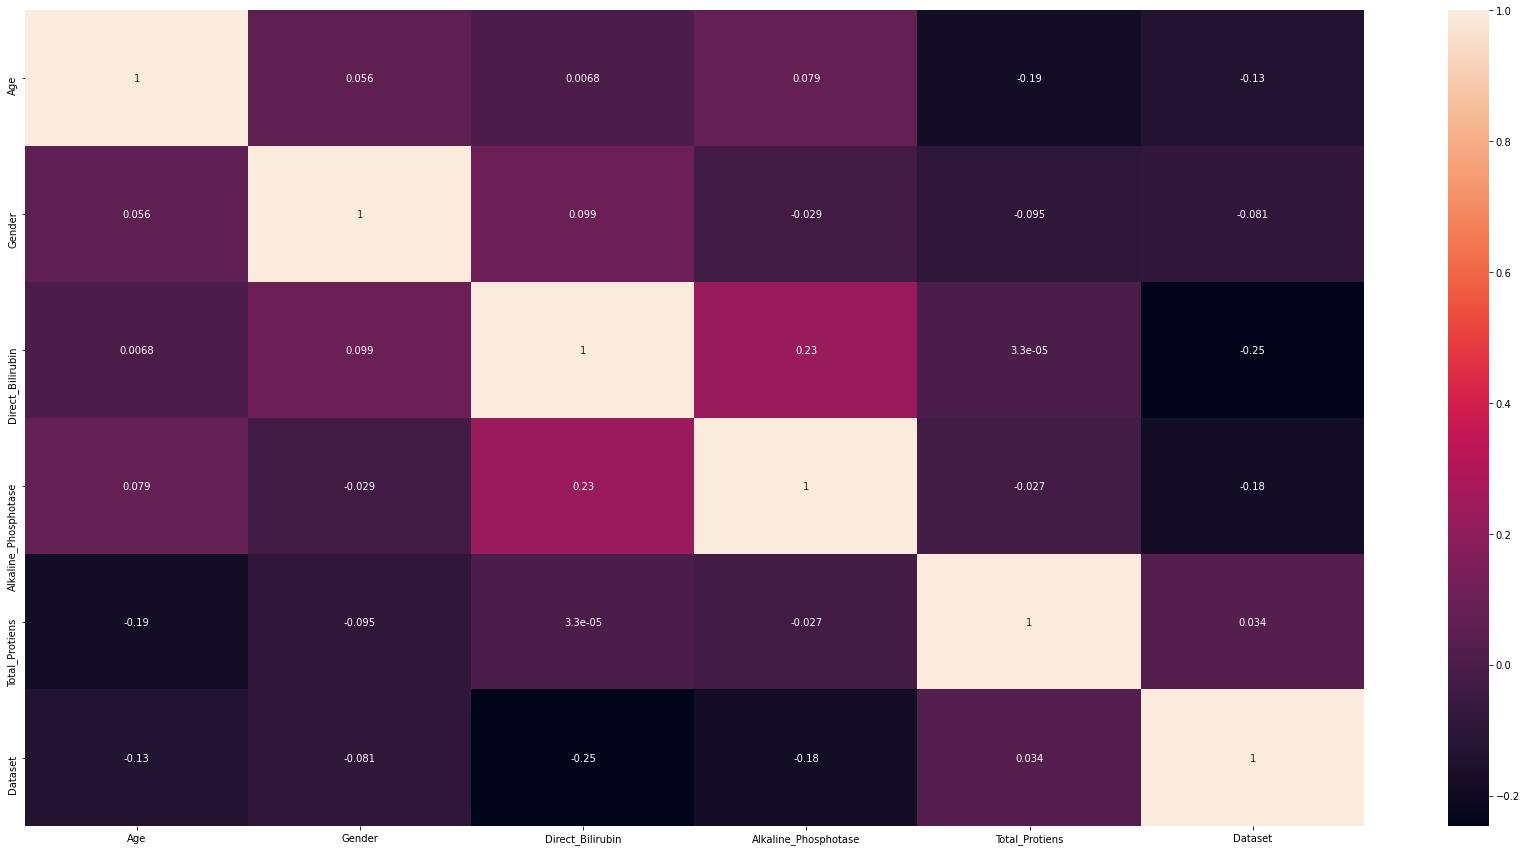

In [20]:
plt.figure(figsize=(30,15))
sns.heatmap(dataset.corr(),annot=True)
plt.show()

##Dataset spliting

In [21]:
features=dataset.iloc[:,:-1]
labels=dataset.iloc[:,[-1]]

In [22]:
labels.replace(2,0,inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4172: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [23]:
labels

,Dataset
0,1
1,1
2,1
3,1
4,1
...,...
578,0
579,1
580,1
581,1


In [24]:
features

,Age,Gender,Direct_Bilirubin,Alkaline_Phosphotase,Total_Protiens
0,65,0,0.1,187,6.8
1,62,1,5.5,699,7.5
2,62,1,4.1,490,7.0
3,58,1,0.4,182,6.8
4,72,1,2.0,195,7.3
...,...,...,...,...,...
578,60,1,0.1,500,5.9
579,40,1,0.1,98,6.0
580,52,1,0.2,245,6.4
581,31,1,0.5,184,6.8


In [25]:
feature_train,feature_test,label_train,label_test=train_test_split(features,labels,test_size=0.2,random_state=42)

In [26]:
feature_train

,Age,Gender,Direct_Bilirubin,Alkaline_Phosphotase,Total_Protiens
75,29,0,0.1,162,5.2
544,54,0,3.2,350,7.0
118,32,1,7.0,280,5.6
323,12,1,0.2,302,6.7
280,58,1,0.2,123,6.0
...,...,...,...,...,...
71,75,0,0.2,188,4.4
106,36,1,2.3,145,5.1
273,30,1,0.2,262,9.6
439,42,0,0.2,168,6.2


In [27]:
label_train

,Dataset
75,0
544,1
118,1
323,0
280,1
...,...
71,1
106,0
273,1
439,1


##Logistic Regression

In [ ]:
model=LogisticRegression(max_iter=1000)
model.fit(feature_train,label_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
label_pred=model.predict(feature_test)

In [ ]:
m.accuracy_score(label_test,label_pred)

0.6206896551724138

In [ ]:
label_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1])

In [ ]:
label_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1])

In [ ]:
label_test

,Dataset
252,0
527,1
564,0
469,1
359,0
...,...
444,0
333,0
185,0
221,1


In [ ]:
print(m.classification_report(label_test,label_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        43
           1       0.63      0.99      0.77        73

    accuracy                           0.62       116
   macro avg       0.31      0.49      0.38       116
weighted avg       0.39      0.62      0.48       116



In [ ]:
print(m.confusion_matrix(label_test,label_pred))

[[ 0 43]
 [ 1 72]]


#KNN

In [ ]:
from sklearn.model_selection import GridSearchCV
knn=KNeighborsClassifier()
param={'n_neighbors':list(np.arange(1,20))}


In [ ]:
model=GridSearchCV(knn,param_grid=param)
model.fit(feature_train,label_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when

GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
model.best_params_

{'n_neighbors': 11}

In [ ]:
model=KNeighborsClassifier(n_neighbors=11)
model.fit(feature_train,label_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                     weights='uniform')

In [ ]:
label_pred=model.predict(feature_test)

In [ ]:
m.accuracy_score(label_test,label_pred)

0.5948275862068966

In [ ]:
print(m.classification_report(label_test,label_pred))

              precision    recall  f1-score   support

           0       0.39      0.16      0.23        43
           1       0.63      0.85      0.73        73

    accuracy                           0.59       116
   macro avg       0.51      0.51      0.48       116
weighted avg       0.54      0.59      0.54       116



In [ ]:
print(m.confusion_matrix(label_test,label_pred))

[[ 7 36]
 [11 62]]


In [ ]:
label_pred

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 1])

In [ ]:
label_test

,Dataset
252,0
527,1
564,0
469,1
359,0
...,...
444,0
333,0
185,0
221,1


##Decision Tree

In [ ]:
from sklearn.model_selection import GridSearchCV
dt=DecisionTreeClassifier()
param={'max_depth':list(np.arange(1,20)),'criterion':['gini','entropy']}


In [ ]:
model=GridSearchCV(dt,param_grid=param)
model.fit(feature_train,label_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                

In [ ]:
model.best_params_

{'criterion': 'gini', 'max_depth': 1}

In [ ]:
model=DecisionTreeClassifier(max_depth=1)
model.fit(feature_train,label_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
label_pred=model.predict(feature_test)

In [ ]:
m.accuracy_score(label_test,label_pred)

0.7471264367816092

In [ ]:
print(m.classification_report(label_test,label_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        44
           1       0.75      1.00      0.86       130

    accuracy                           0.75       174
   macro avg       0.37      0.50      0.43       174
weighted avg       0.56      0.75      0.64       174



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print(m.confusion_matrix(label_test,label_pred))

[[  0  44]
 [  0 130]]


In [ ]:
label_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
label_test

,Dataset
512,0
443,1
237,1
502,1
461,1
...,...
308,1
546,1
20,1
113,1


##SVM

In [ ]:
model=SVC(kernel='linear')
model.fit(feature_train,label_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
label_pred=model.predict(feature_test)

In [ ]:
m.accuracy_score(label_test,label_pred)

0.7471264367816092

In [ ]:
print(m.classification_report(label_test,label_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        44
           1       0.75      1.00      0.86       130

    accuracy                           0.75       174
   macro avg       0.37      0.50      0.43       174
weighted avg       0.56      0.75      0.64       174



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print(m.confusion_matrix(label_test,label_pred))

[[  0  44]
 [  0 130]]


In [ ]:
label_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
label_test

,Dataset
512,0
443,1
237,1
502,1
461,1
...,...
308,1
546,1
20,1
113,1


##Random Forest Classifier

In [ ]:
from sklearn.model_selection import GridSearchCV
rfc=RandomForestClassifier()
param={'n_estimators':[100,200,300,400],'max_depth':list(np.arange(1,20))}


In [ ]:
model=GridSearchCV(rfc,param_grid=param)
model.fit(feature_train,label_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              ra

In [ ]:
model.best_params_

{'max_depth': 1, 'n_estimators': 100}

In [ ]:
model=model.best_estimator_


In [ ]:
label_pred=model.predict(feature_test)

In [ ]:
m.accuracy_score(label_test,label_pred)

0.7471264367816092

In [ ]:
print(m.classification_report(label_test,label_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        44
           1       0.75      1.00      0.86       130

    accuracy                           0.75       174
   macro avg       0.37      0.50      0.43       174
weighted avg       0.56      0.75      0.64       174



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print(m.confusion_matrix(label_test,label_pred))

[[  0  44]
 [  0 130]]


In [ ]:
label_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
label_test

,Dataset
512,0
443,1
237,1
502,1
461,1
...,...
308,1
546,1
20,1
113,1


#Neural Network

In [28]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

In [29]:
len(label_train[label_train==1])

463

In [30]:
label_train.index=np.arange(0,463)

In [31]:
label_train.columns=['label']

In [32]:
label_train

,label
0,0
1,1
2,1
3,0
4,1
...,...
458,1
459,0
460,1
461,1


In [33]:
feature_train=np.array(feature_train)

In [34]:
feature_test.columns

Index(['Age', 'Gender', 'Direct_Bilirubin', 'Alkaline_Phosphotase',
       'Total_Protiens'],
      dtype='object')

In [35]:
feature_train=pd.DataFrame(feature_train,columns=['Age', 'Gender', 'Direct_Bilirubin', 'Alkaline_Phosphotase',
       'Total_Protiens'])

In [36]:
feature_train

,Age,Gender,Direct_Bilirubin,Alkaline_Phosphotase,Total_Protiens
0,29.0,0.0,0.1,162.0,5.2
1,54.0,0.0,3.2,350.0,7.0
2,32.0,1.0,7.0,280.0,5.6
3,12.0,1.0,0.2,302.0,6.7
4,58.0,1.0,0.2,123.0,6.0
...,...,...,...,...,...
458,75.0,0.0,0.2,188.0,4.4
459,36.0,1.0,2.3,145.0,5.1
460,30.0,1.0,0.2,262.0,9.6
461,42.0,0.0,0.2,168.0,6.2


In [37]:
data_train=pd.concat([feature_train,label_train],axis=1)

In [38]:
data_train

,Age,Gender,Direct_Bilirubin,Alkaline_Phosphotase,Total_Protiens,label
0,29.0,0.0,0.1,162.0,5.2,0
1,54.0,0.0,3.2,350.0,7.0,1
2,32.0,1.0,7.0,280.0,5.6,1
3,12.0,1.0,0.2,302.0,6.7,0
4,58.0,1.0,0.2,123.0,6.0,1
...,...,...,...,...,...,...
458,75.0,0.0,0.2,188.0,4.4,1
459,36.0,1.0,2.3,145.0,5.1,0
460,30.0,1.0,0.2,262.0,9.6,1
461,42.0,0.0,0.2,168.0,6.2,1


In [39]:
feature_train=data_train.iloc[:,:-1]

In [40]:
feature_train

,Age,Gender,Direct_Bilirubin,Alkaline_Phosphotase,Total_Protiens
0,29.0,0.0,0.1,162.0,5.2
1,54.0,0.0,3.2,350.0,7.0
2,32.0,1.0,7.0,280.0,5.6
3,12.0,1.0,0.2,302.0,6.7
4,58.0,1.0,0.2,123.0,6.0
...,...,...,...,...,...
458,75.0,0.0,0.2,188.0,4.4
459,36.0,1.0,2.3,145.0,5.1
460,30.0,1.0,0.2,262.0,9.6
461,42.0,0.0,0.2,168.0,6.2


In [41]:
label_train=data_train.iloc[:,-1]

In [57]:
from keras.utils.np_utils import to_categorical
label_train=to_categorical(label_train)
label_test=to_categorical(label_test)

In [58]:
label_test

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.

In [59]:
feature_train.shape

(463, 5)

In [60]:
model=Sequential()
model.add(Dense(256,input_shape=[5],activation='relu'))


model.add(Dense(2,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [61]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 256)               1536      
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 514       
Total params: 2,050
Trainable params: 2,050
Non-trainable params: 0
_________________________________________________________________


In [62]:
model.fit(feature_train,label_train,epochs=500)

Epoch 1/500
15/15 [==============================] - 0s 3ms/step - loss: 5.4291 - accuracy: 0.7322
Epoch 2/500
15/15 [==============================] - 0s 3ms/step - loss: 2.4201 - accuracy: 0.7279
Epoch 3/500
15/15 [==============================] - 0s 3ms/step - loss: 0.9270 - accuracy: 0.6739
Epoch 4/500
15/15 [==============================] - 0s 3ms/step - loss: 0.6264 - accuracy: 0.6717
Epoch 5/500
15/15 [==============================] - 0s 3ms/step - loss: 0.5689 - accuracy: 0.7365
Epoch 6/500
15/15 [==============================] - 0s 3ms/step - loss: 0.5403 - accuracy: 0.7451
Epoch 7/500
15/15 [==============================] - 0s 3ms/step - loss: 0.5796 - accuracy: 0.7300
Epoch 8/500
15/15 [==============================] - 0s 3ms/step - loss: 0.7125 - accuracy: 0.6739
Epoch 9/500
15/15 [==============================] - 0s 3ms/step - loss: 0.5557 - accuracy: 0.7365
Epoch 10/500
15/15 [==============================] - 0s 3ms/step - loss: 0.5326 - accuracy: 0.7257
Epoch 11/

In [63]:
label_pred=model.predict(feature_test)

In [64]:
label_pred

array([[4.77105826e-01, 6.44009411e-01],
       [1.57633871e-01, 9.19320583e-01],
       [5.82743466e-01, 4.89687294e-01],
       [3.89613301e-01, 7.01321900e-01],
       [1.89039856e-01, 8.70921791e-01],
       [4.38809276e-01, 6.47921443e-01],
       [6.10724807e-01, 4.79885966e-01],
       [5.75659156e-01, 5.33744633e-01],
       [3.47293280e-02, 9.93988752e-01],
       [4.48055685e-01, 6.47182107e-01],
       [7.16139376e-02, 9.59953547e-01],
       [5.34680843e-01, 6.24136031e-01],
       [4.63791668e-01, 6.52441263e-01],
       [5.45776844e-01, 5.35150468e-01],
       [7.21656084e-01, 4.14985895e-01],
       [4.98042643e-01, 5.85915387e-01],
       [6.77571967e-02, 9.85681415e-01],
       [3.87787193e-01, 7.01116621e-01],
       [2.87197620e-01, 7.93086290e-01],
       [1.48267969e-01, 8.58614445e-01],
       [4.38068539e-01, 6.43835127e-01],
       [8.68421718e-02, 9.52472031e-01],
       [5.21460891e-01, 5.87617099e-01],
       [6.39022291e-01, 4.61701572e-01],
       [2.612895

In [65]:
label_pred=np.argmax(label_pred,axis=1)

In [66]:
label_pred

array([1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1])

In [67]:
label_test=np.argmax(label_test,axis=1)
label_train=np.argmax(label_train,axis=1)

In [68]:
m.accuracy_score(label_test,label_pred)

0.6120689655172413

In [69]:
print(m.classification_report(label_test,label_pred))

              precision    recall  f1-score   support

           0       0.47      0.33      0.38        43
           1       0.66      0.78      0.72        73

    accuracy                           0.61       116
   macro avg       0.56      0.55      0.55       116
weighted avg       0.59      0.61      0.59       116



In [70]:
print(m.confusion_matrix(label_test,label_pred))

[[14 29]
 [16 57]]


In [71]:
label_pred

array([1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1])

In [72]:
label_test

array([0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1])

In [73]:
import tensorflow
model.save('model_liver.h5')

In [74]:
# We need to create a TFLite Converter Object from model we created

converter = tensorflow.lite.TFLiteConverter.from_keras_model(model=model)

In [75]:
# Create a tflite model object from TFLite Converter

tfmodel = converter.convert()

# Save TFLite model into a .tflite file 

open("degree_liver.tflite","wb").write(tfmodel)

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: /tmp/tmpu0qw2mmt/assets


9520